## LSTM Experiment
Insert Code wherever represented with "#***************#"

In [2]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences

# fix random seed for reproducibility
#numpy.random.seed(7)

In [4]:
top_words = 5000

"""
    Load the IMDB Movie Review dataset and train them into train and split from imdb.load_dataset
    Also mention the num_words parameter as top_words
"""
#********************#
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))
print(y_train[1])
print(type(y_train[1]))

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189
0
<class 'numpy.int64'>


In [6]:
# truncate and/or pad input sequences
max_review_length = 400
"""
    Apply padding to both X_train and x_test variables with above mentioned max_review_length
"""
#X_train = #********************#
#X_test = #********************#
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 400)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [7]:
import tensorflow as tf
# Create the model

embedding_vector_length = 32

"""
    Create LSTM Model using following Layers:
    1. Embedding Layer
    2. LSTM with 10 neurons
    3. Dense Layer with sigmoid activation for Output
"""
model = Sequential()
#model.add(#********************#)
#model.add(#********************#)
#model.add(#********************#)
model.add(Embedding(top_words+1, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
"""
    Compile the model using following criteria:
    compile(loss, optimizer, metrics=['accuracy'])
"""
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
hist=model.fit(X_train, y_train, epochs=10, batch_size=256,verbose=1, validation_data=(X_test,y_test))

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

"""
    Print Accuracy acheived by model using the above created scores variable
"""
#print("Accuracy: %.2f%%" % (#********************#))
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.6310 - loss: 0.6359 - val_accuracy: 0.7642 - val_loss: 0.5358
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.8290 - loss: 0.4115 - val_accuracy: 0.8606 - val_loss: 0.3493
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8968 - loss: 0.2667 - val_accuracy: 0.8755 - val_loss: 0.2989
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9155 - loss: 0.2275 - val_accuracy: 0.8751 - val_loss: 0.2966
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9270 - loss: 0.1978 - val_accuracy: 0.8756 - val_loss: 0.3376
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9336 - loss: 0.1817 - val_accuracy: 0.8747 - val_loss: 0.3079
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9418 - loss: 0.1579 - val_accuracy: 0.8750 - val_loss: 0.3270
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9457 - loss: 0.1501 - val_accuracy: 0.8758 - v

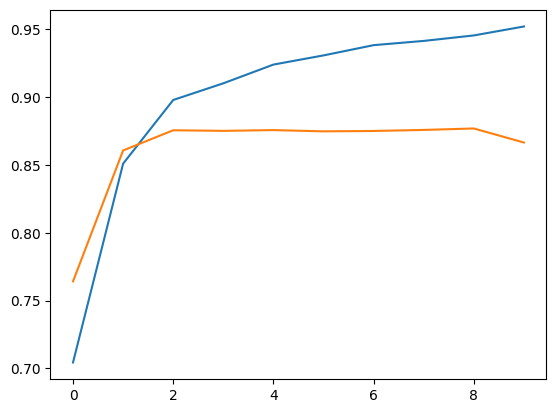

In [12]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs Accuracy
"""
#********************#

y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

Text(0.5, 1.0, 'Epoch vs Loss')

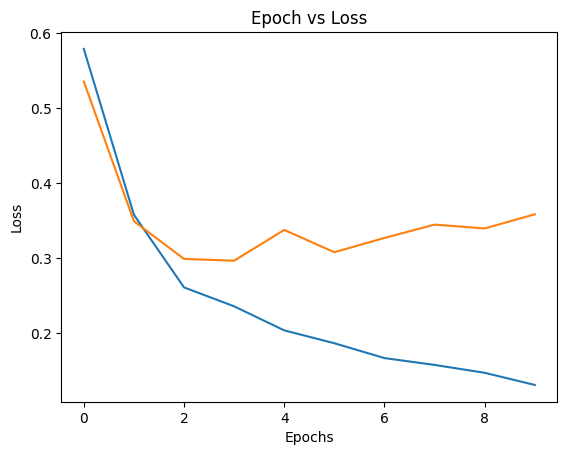

In [13]:
import matplotlib.pyplot as plt
"""
    Plot graph between epoch vs loss
"""
#********************#
y1_loss = hist.history['loss']
y2_val_loss = hist.history['val_loss']

# Plot the training and validation loss
plt.plot(y1_loss, label='Training Loss')
plt.plot(y2_val_loss, label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')

In [14]:
pred=model.predict(X_test)
print(pred)

782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step
[[0.02241136]
 [0.9974596 ]
 [0.7639382 ]
 ...
 [0.02578277]
 [0.01500364]
 [0.18854563]]
